In [2]:
import os
from dotenv import load_dotenv
import pandas as pd
import numpy as np

load_dotenv()
TRAIN_SET = os.getenv("TRAIN_PATH")
TEST_SET  = os.getenv("TEST_PATH")

train = pd.read_csv(TRAIN_SET)
test = pd.read_csv(TEST_SET) 

train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Estraggo la target feature: _'sii'_ 

In [ ]:
#extact the target variable: sii feature
y_train = train["sii"]
print(y_train, "\n", "=============================================")
print(y_train.shape, "\n", "=============================================")
print(y_train.info())

0       2.0
1       0.0
2       0.0
3       1.0
4       NaN
       ... 
3955    1.0
3956    NaN
3957    1.0
3958    0.0
3959    NaN
Name: sii, Length: 3960, dtype: float64 
(3960,) 
<class 'pandas.core.series.Series'>
RangeIndex: 3960 entries, 0 to 3959
Series name: sii
Non-Null Count  Dtype  
--------------  -----  
2736 non-null   float64
dtypes: float64(1)
memory usage: 31.1 KB
None


Notare che y_target ha il 75% circa di valori non-null (2736/3660) * 100

**Pulizia dei dati:**
 - Rimuovo le feature non presenti nel test set e stampo percentuali dei valori presenti
 

In [4]:
def intersect_features(tr, ts):
    smaller_train = tr[tr.columns.intersection(ts.columns)]

    # Crea una lista per memorizzare le righe
    rows = []

    # Per ogni feature nelle colonne comuni tra train e test
    for feature in smaller_train.columns:
        # Calcola la percentuale di valori non nulli nel train e nel test
        train_not_null_perc = 100 * smaller_train[feature].notnull().sum() / len(smaller_train)
        test_not_null_perc = 100 * test[feature].notnull().sum() / len(test)
        
        # Aggiungi il risultato alla lista
        rows.append({'feature': feature, 'train': train_not_null_perc, 'test': test_not_null_perc})

    # Converti la lista in un DataFrame
    features = pd.DataFrame(rows)
    features.sort_values('train', ascending=False, inplace=True)

    return smaller_train, features

intersect_features(train, test)
real_train = intersect_features(train, test)[0]
real_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

 - Rimuovo le feature con una certa percentuale di valori NaN. Droppo anche la feature relativa all'id. Ho già droppato la target column

In [5]:
real_train_no_id = real_train.drop(columns=["id"], axis=1)

In [6]:
# Drop the columns with more than a fixed percentage of missing values:
def drop_columns(df, threshold = 0.3): #by default the threshold is 20%. If a column is >= 80% of NaNs, it will be dropped. It can be changed.

    # Calculate the minimum required non-NaN values per column based on the threshold percentage
    minimum_non_NaN = len(df) * threshold   

    # Identify columns to be dropped
    dropped_columns = df.columns[df.isnull().sum() > (len(df) - minimum_non_NaN)].tolist()

    # Drop the identified columns from the DataFrame
    new_df = df.drop(columns=dropped_columns)

    return new_df, dropped_columns

cleaned_train, dropped_columns = drop_columns(real_train_no_id)
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Enroll_Season               3960 non-null   object 
 1   Basic_Demos-Age                         3960 non-null   int64  
 2   Basic_Demos-Sex                         3960 non-null   int64  
 3   CGAS-Season                             2555 non-null   object 
 4   CGAS-CGAS_Score                         2421 non-null   float64
 5   Physical-Season                         3310 non-null   object 
 6   Physical-BMI                            3022 non-null   float64
 7   Physical-Height                         3027 non-null   float64
 8   Physical-Weight                         3076 non-null   float64
 9   Physical-Diastolic_BP                   2954 non-null   float64
 10  Physical-HeartRate                      2967 non-null   floa

In [7]:
cleaned_train.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,...,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_C-Season,PAQ_C-PAQ_C_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday
0,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,...,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,NaN,Fall,3.0
1,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,75.0,...,39.4497,15.4107,27.0552,Fall,2.340,Fall,46.0,64.0,Summer,0.0
2,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,65.0,...,NaN,NaN,NaN,Summer,2.170,Fall,38.0,54.0,Summer,2.0
3,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,60.0,...,58.9338,26.4798,45.9966,Winter,2.451,Summer,31.0,45.0,Winter,0.0
4,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 - Divido le feature nel mio dataset tra numerical features e cathegorical features. Converto poi le cathegorical tramite 1HE

In [8]:
def extract_numerical_cathegorical(df):
    # Extract numerical and categorical columns
    numerical = df.select_dtypes(include=np.number).columns.tolist()
    categorical = df.select_dtypes(exclude=np.number).columns.tolist()

    return numerical, categorical

numerical_features, categorical_features = extract_numerical_cathegorical(cleaned_train)
print("Numerical features are", len(numerical_features), "; -> ", numerical_features)
print("Cathegorical features are: ", len(categorical_features), "; -> ", categorical_features)

Numerical features are 39 ; ->  ['Basic_Demos-Age', 'Basic_Demos-Sex', 'CGAS-CGAS_Score', 'Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'PAQ_C-PAQ_C_Total', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T', 'PreInt_EduHx-computerinternet_hoursday']
Cathegorical features are:  9 ; ->  ['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'Fitness_Endurance-Season', 'FGC-Season', 'BIA-Season', 'PAQ_C-Season', 'SDS-Season', 'PreInt_EduHx-Season']


In [9]:
cleaned_train_1he = pd.get_dummies(cleaned_train, columns=categorical_features)
cleaned_train_1he.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   int64  
 1   Basic_Demos-Sex                         3960 non-null   int64  
 2   CGAS-CGAS_Score                         2421 non-null   float64
 3   Physical-BMI                            3022 non-null   float64
 4   Physical-Height                         3027 non-null   float64
 5   Physical-Weight                         3076 non-null   float64
 6   Physical-Diastolic_BP                   2954 non-null   float64
 7   Physical-HeartRate                      2967 non-null   float64
 8   Physical-Systolic_BP                    2954 non-null   float64
 9   FGC-FGC_CU                              2322 non-null   float64
 10  FGC-FGC_CU_Zone                         2282 non-null   floa

In [10]:
cleaned_train_1he.head()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,...,PAQ_C-Season_Summer,PAQ_C-Season_Winter,SDS-Season_Fall,SDS-Season_Spring,SDS-Season_Summer,SDS-Season_Winter,PreInt_EduHx-Season_Fall,PreInt_EduHx-Season_Spring,PreInt_EduHx-Season_Summer,PreInt_EduHx-Season_Winter
0,5,0,51.0,16.877316,46.0,50.8,NaN,NaN,NaN,0.0,...,False,False,False,False,False,False,True,False,False,False
1,9,0,NaN,14.035590,48.0,46.0,75.0,70.0,122.0,3.0,...,False,False,True,False,False,False,False,False,True,False
2,10,1,71.0,16.648696,56.5,75.6,65.0,94.0,117.0,20.0,...,True,False,True,False,False,False,False,False,True,False
3,9,0,71.0,18.292347,56.0,81.6,60.0,97.0,117.0,18.0,...,False,True,False,False,True,False,False,False,False,True
4,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


Ci sono 39 features numeriche e 36 features categoriche codificate tramite 1HE. Le 1HE sono sottoforma di true/false. Le rendo features numeriche:
 - false -> 0
 - true  -> 1

Così da mantenerle colonne sparse.
Successivamente converto tutte le colonne con lo stesso tipo numerico in _float64_

In [12]:
cleaned_train_1he *= 1
cleaned_train_1he = cleaned_train_1he.astype('float64')
cleaned_train_1he.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   float64
 1   Basic_Demos-Sex                         3960 non-null   float64
 2   CGAS-CGAS_Score                         2421 non-null   float64
 3   Physical-BMI                            3022 non-null   float64
 4   Physical-Height                         3027 non-null   float64
 5   Physical-Weight                         3076 non-null   float64
 6   Physical-Diastolic_BP                   2954 non-null   float64
 7   Physical-HeartRate                      2967 non-null   float64
 8   Physical-Systolic_BP                    2954 non-null   float64
 9   FGC-FGC_CU                              2322 non-null   float64
 10  FGC-FGC_CU_Zone                         2282 non-null   floa

 - Tramite bootstrap sampling sostituisco i valori NaN con valori stimati

In [ ]:
cleaned_train_1he = cleaned_train_1he.fillna(cleaned_train_1he.mean())
cleaned_train_1he.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 75 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         3960 non-null   float64
 1   Basic_Demos-Sex                         3960 non-null   float64
 2   CGAS-CGAS_Score                         3960 non-null   float64
 3   Physical-BMI                            3960 non-null   float64
 4   Physical-Height                         3960 non-null   float64
 5   Physical-Weight                         3960 non-null   float64
 6   Physical-Diastolic_BP                   3960 non-null   float64
 7   Physical-HeartRate                      3960 non-null   float64
 8   Physical-Systolic_BP                    3960 non-null   float64
 9   FGC-FGC_CU                              3960 non-null   float64
 10  FGC-FGC_CU_Zone                         3960 non-null   floa

Equivalentemente stimo i valori per la variabile target:

In [18]:
y_train = y_train.fillna(y_train.mean())
y_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3960 entries, 0 to 3959
Series name: sii
Non-Null Count  Dtype  
--------------  -----  
3960 non-null   float64
dtypes: float64(1)
memory usage: 31.1 KB


**Model training:**

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score  

model = RandomForestRegressor(n_estimators=100)
model.fit(cleaned_train_1he, y_train)

# stampo MSE:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(cleaned_train_1he)
mse = mean_squared_error(y_train, y_pred)
print("MSE: ", mse)

MSE:  0.04633512183694656


Adesso controllo ciascuna delle feature importance allo scopo di droppare le meno utili per la mia classificazione

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

Features sorted by their score: [0.0777281  0.00566487 0.04716313 0.02657637 0.06022239 0.03283158
 0.03140281 0.03656036 0.03817739 0.02406836 0.00388038 0.02213567
 0.00297056 0.01536672 0.00272801 0.02074686 0.00337514 0.01798794
 0.00349235 0.00763676 0.02542939 0.01346513 0.0051674  0.02332052
 0.01473712 0.00560984 0.01734127 0.01236072 0.01180329 0.00409826
 0.01189094 0.02129755 0.00968045 0.01508089 0.00719674 0.03384967
 0.07251032 0.05064493 0.048351   0.00243644 0.00213633 0.0027687
 0.00257549 0.00491353 0.00512037 0.00462417 0.00416455 0.00340403
 0.00230004 0.00227375 0.00245921 0.00209208 0.00283209 0.00291429
 0.00352766 0.00315218 0.00383243 0.00313787 0.00321171 0.00237367
 0.00188033 0.00206031 0.00133208 0.00250507 0.00304882 0.00261006
 0.00685164 0.00371027 0.0052634  0.00367813 0.00545854 0.00294426
 0.00244855 0.00244994 0.00295683]


[Text(0, 0, 'Basic_Demos-Age'),
 Text(1, 0, 'Basic_Demos-Sex'),
 Text(2, 0, 'CGAS-CGAS_Score'),
 Text(3, 0, 'Physical-BMI'),
 Text(4, 0, 'Physical-Height'),
 Text(5, 0, 'Physical-Weight'),
 Text(6, 0, 'Physical-Diastolic_BP'),
 Text(7, 0, 'Physical-HeartRate'),
 Text(8, 0, 'Physical-Systolic_BP'),
 Text(9, 0, 'FGC-FGC_CU'),
 Text(10, 0, 'FGC-FGC_CU_Zone'),
 Text(11, 0, 'FGC-FGC_PU'),
 Text(12, 0, 'FGC-FGC_PU_Zone'),
 Text(13, 0, 'FGC-FGC_SRL'),
 Text(14, 0, 'FGC-FGC_SRL_Zone'),
 Text(15, 0, 'FGC-FGC_SRR'),
 Text(16, 0, 'FGC-FGC_SRR_Zone'),
 Text(17, 0, 'FGC-FGC_TL'),
 Text(18, 0, 'FGC-FGC_TL_Zone'),
 Text(19, 0, 'BIA-BIA_Activity_Level_num'),
 Text(20, 0, 'BIA-BIA_BMC'),
 Text(21, 0, 'BIA-BIA_BMI'),
 Text(22, 0, 'BIA-BIA_BMR'),
 Text(23, 0, 'BIA-BIA_DEE'),
 Text(24, 0, 'BIA-BIA_ECW'),
 Text(25, 0, 'BIA-BIA_FFM'),
 Text(26, 0, 'BIA-BIA_FFMI'),
 Text(27, 0, 'BIA-BIA_FMI'),
 Text(28, 0, 'BIA-BIA_Fat'),
 Text(29, 0, 'BIA-BIA_Frame_num'),
 Text(30, 0, 'BIA-BIA_ICW'),
 Text(31, 0, 'BIA-BIA_L

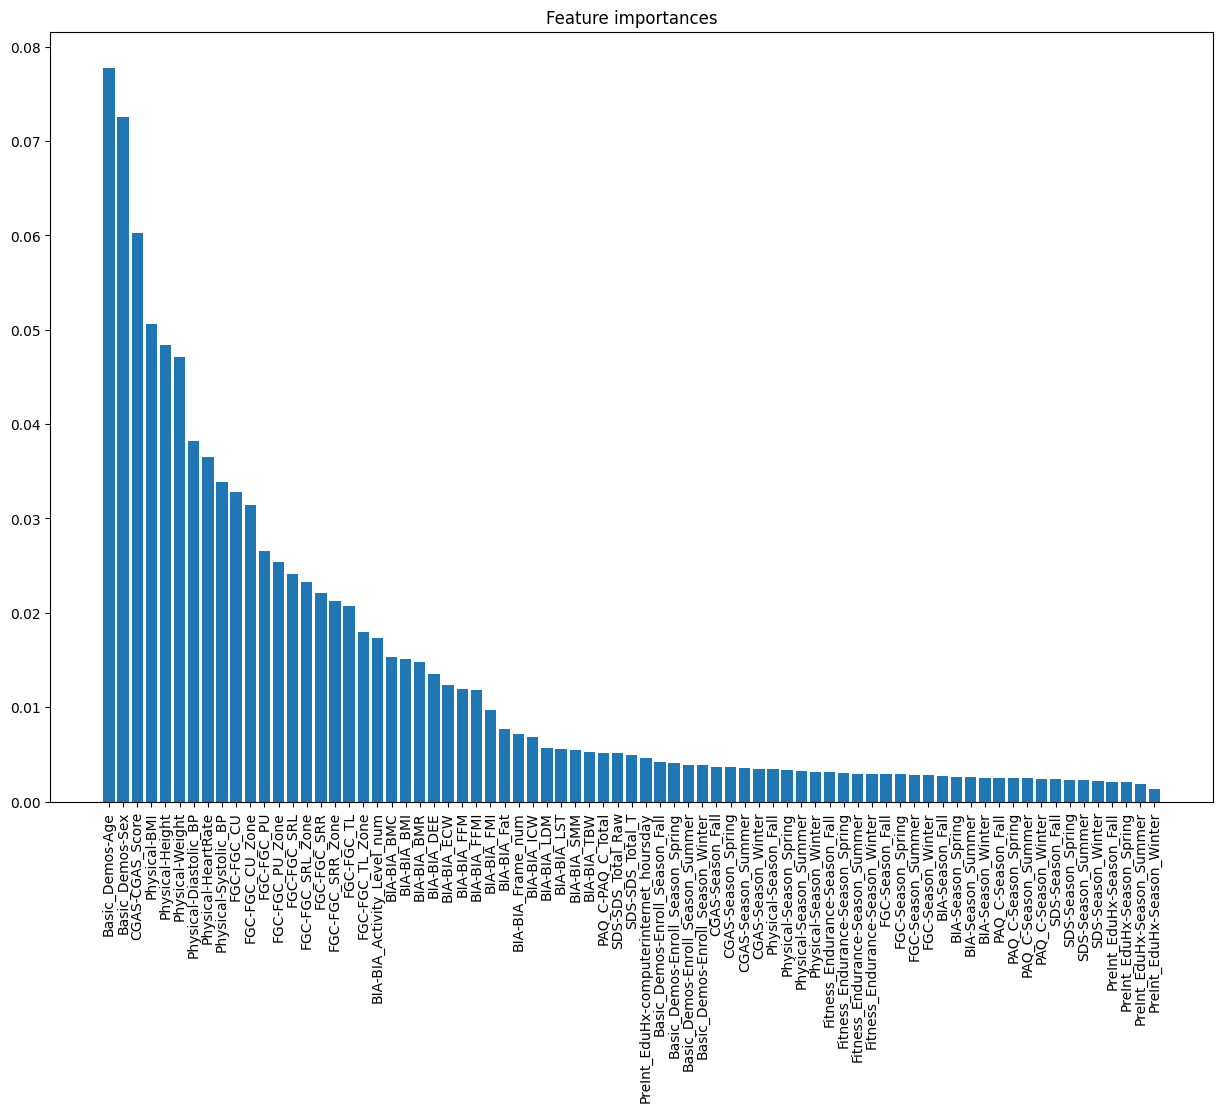

In [34]:
feature_names = np.array(cleaned_train_1he.columns)
print("Features sorted by their score:", model.feature_importances_)

fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(range(0, cleaned_train_1he.shape[1]), sorted(model.feature_importances_)[::-1])
ax.set_title("Feature importances")
ax.set_xticks(range(cleaned_train_1he.shape[1]))
ax.set_xticklabels(feature_names, rotation=90)

Stampo quindi come varia il mean squared error rispetto al numero di features che si considerano per il fit del mio modello

In [36]:
"""
from sklearn.model_selection import cross_val_score

best_features = np.argsort(model.feature_importances_)[::-1]

rmse = []

for f in range(1,len(best_features)+1):
    rf_small = RandomForestRegressor(n_estimators=100)
    scores = cross_val_score(rf_small,
                             cleaned_train_1he[:,best_features[:f]], y_train,
                             cv=5, scoring='neg_mean_squared_error')
    rmse += [-scores.mean()]

print (f"Full score: {rmse[-1]:.2f}")
print (f"Best score: {min(rmse):.2f}")"""

'\nfrom sklearn.model_selection import cross_val_score\n\nbest_features = np.argsort(model.feature_importances_)[::-1]\n\nrmse = []\n\nfor f in range(1,len(best_features)+1):\n    rf_small = RandomForestRegressor(n_estimators=100)\n    scores = cross_val_score(rf_small,\n                             cleaned_train_1he[:,best_features[:f]], y_train,\n                             cv=5, scoring=\'neg_mean_squared_error\')\n    rmse += [-scores.mean()]\n\nprint (f"Full score: {rmse[-1]:.2f}")\nprint (f"Best score: {min(rmse):.2f}")'

In [37]:
"""
fig, ax = plt.subplots(figsize=(9,4))
ax.plot(range(1,len(best_features)+1), rmse, 'o-', label="RMSE")
ax.set_title("RMSE on varying features")
ax.set_xlabel("Number of Best features used")
ax.set_ylabel("RMSE")
ax.grid(); """

'\nfig, ax = plt.subplots(figsize=(9,4))\nax.plot(range(1,len(best_features)+1), rmse, \'o-\', label="RMSE")\nax.set_title("RMSE on varying features")\nax.set_xlabel("Number of Best features used")\nax.set_ylabel("RMSE")\nax.grid(); '